FileNotFoundError: [Errno 2] No such file or directory: '/Users/viktorsuter/Desktop/Scenarios/S000001/S000001_all_runs.csv'

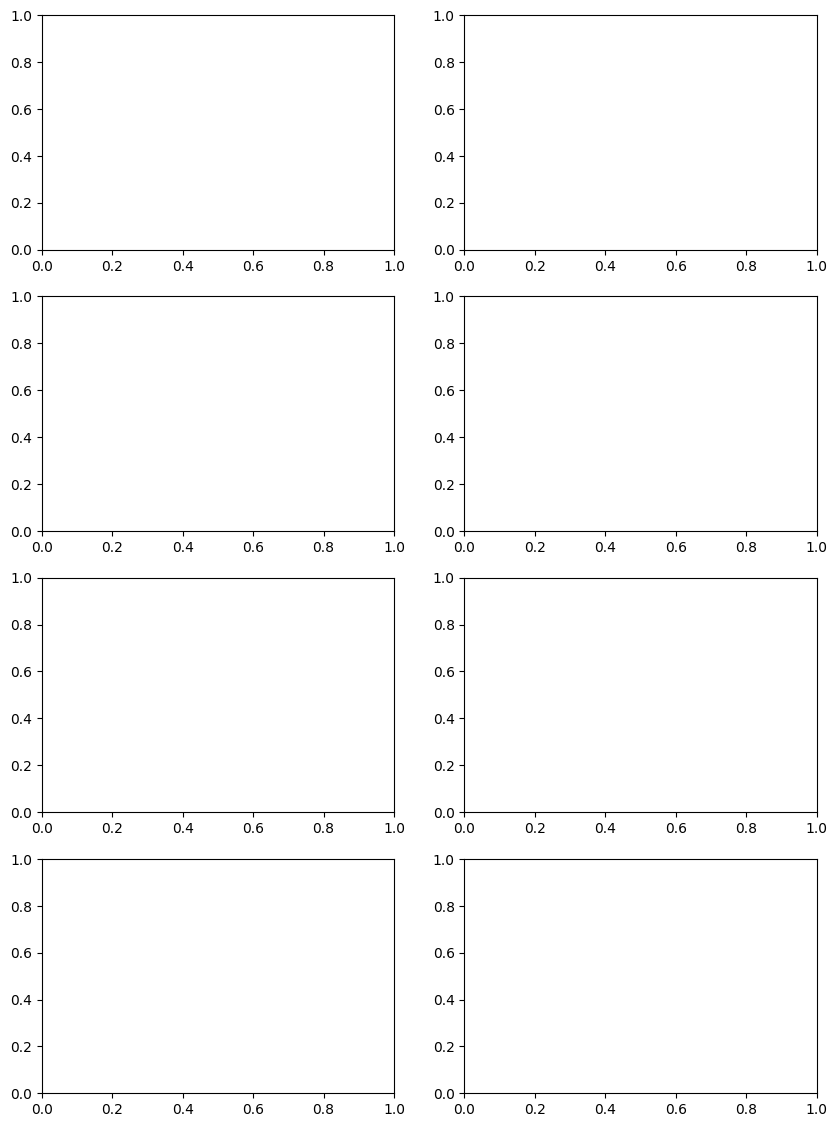

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NOTE: UPDATE THESE FILE PATHS before running!
# Replace '/Users/viktorsuter/Desktop/Scenarios/' with your own path
scenarios = {
    1: '/Users/viktorsuter/Desktop/Scenarios/S000001/S000001_all_runs.csv',
    2: '/Users/viktorsuter/Desktop/Scenarios/S000002/S000002_all_runs.csv',
    3: '/Users/viktorsuter/Desktop/Scenarios/S000003/S000003_all_runs.csv',
    4: '/Users/viktorsuter/Desktop/Scenarios/S000004/S000004_all_runs.csv'
}

routes = [1, 2]
route_descriptions = {1: 'East-to-West', 2: 'West-to-East'}

# Define fixed bins for all plots (140 to 300)
bins = np.linspace(140, 300, 51)

# Create one large figure with all scenarios (4 rows × 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(10, 14))

for row, (scenario_num, file_path) in enumerate(scenarios.items()):
    # Load the data
    df = pd.read_csv(file_path)

    # Filter for routes 1 and 2, and only buses
    routes_df = df[df['Nr.'].isin([1, 2])].copy()
    buses_df = routes_df[routes_df['FzTyp'] == 300]

    for col, route in enumerate(routes):
        # Filter data for this route
        data = buses_df[buses_df['Nr.'] == route]['Rsz.']

        # Plot histogram with fixed bins and vibrant orange color
        axes[row, col].hist(data, bins=bins, edgecolor='black', alpha=0.7,
                           color='#FF8C42')
        axes[row, col].set_title(f'Scenario {scenario_num} | Route {route} ({route_descriptions[route]}) | n={len(data)}',
                                fontsize=10)

        # Only add x-axis label to the bottom row
        if row == 3:
            axes[row, col].set_xlabel('Travel Time (s)', fontsize=9)

        # Only add y-axis label to the left column
        if col == 0:
            axes[row, col].set_ylabel('Frequency', fontsize=9)

        axes[row, col].tick_params(labelsize=8)

        # Fix axes
        axes[row, col].set_xlim(140, 260)
        axes[row, col].set_ylim(0, 80)

        # Minimal grid with borders
        axes[row, col].grid(True, alpha=0.2, linewidth=0.5)

plt.tight_layout()

# Save the figure (UPDATE the output path to preferred location)
plt.savefig('/Users/viktorsuter/Desktop/histograms_bus_travel_time_scenarios.png', dpi=300, bbox_inches='tight')

plt.show()

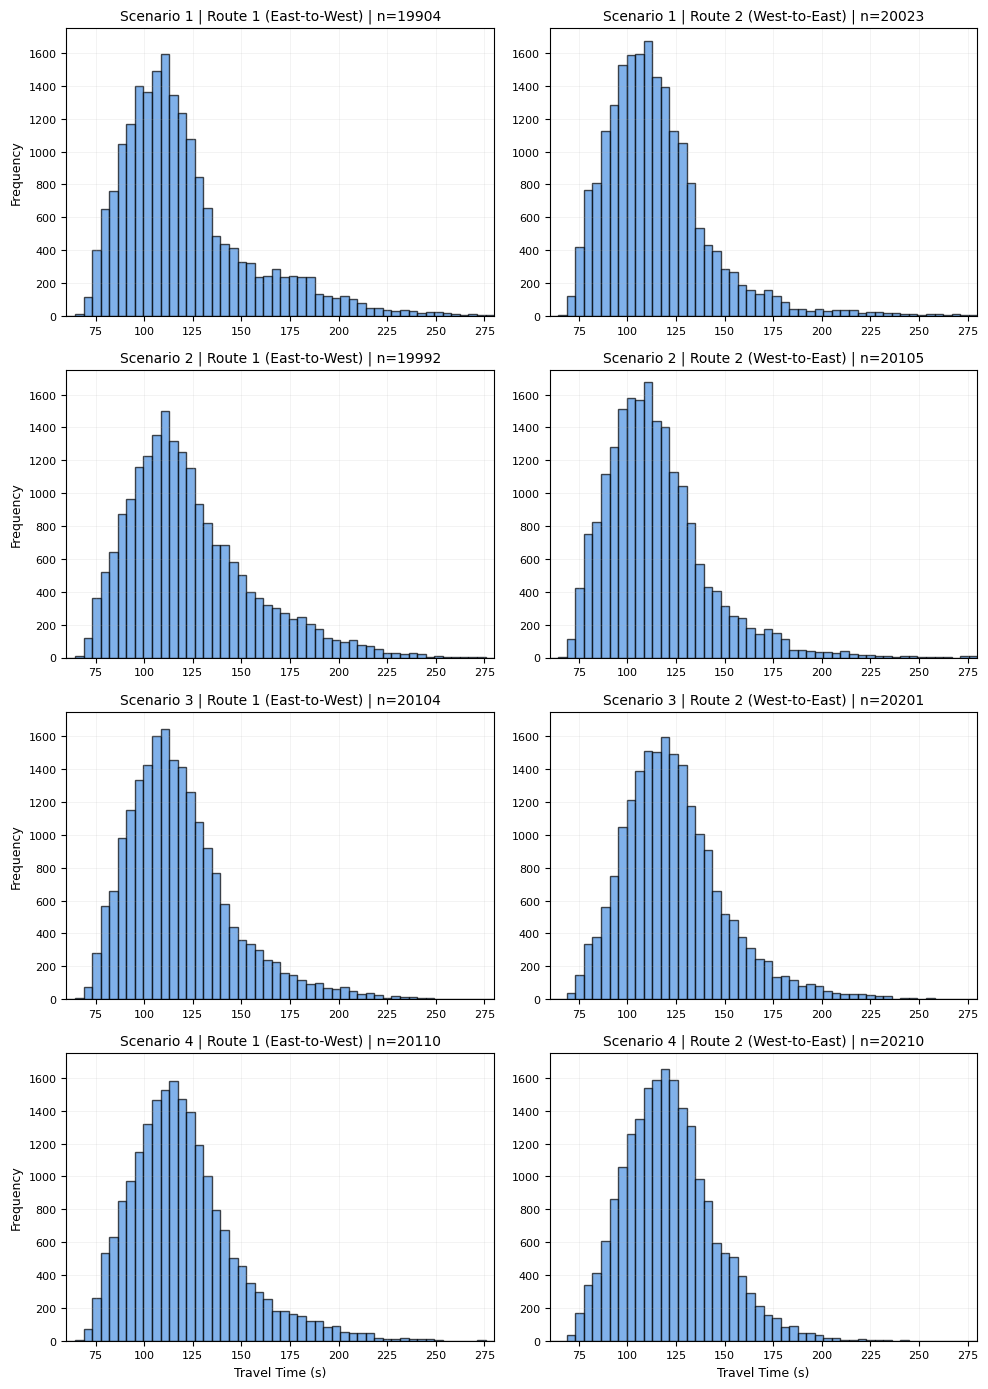

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NOTE: UPDATE THESE FILE PATHS before running!
# Replace '/Users/viktorsuter/Desktop/Scenarios/' with your own directory path
scenarios = {
    1: '/Users/viktorsuter/Desktop/Scenarios/S000001/S000001_all_runs.csv',
    2: '/Users/viktorsuter/Desktop/Scenarios/S000002/S000002_all_runs.csv',
    3: '/Users/viktorsuter/Desktop/Scenarios/S000003/S000003_all_runs.csv',
    4: '/Users/viktorsuter/Desktop/Scenarios/S000004/S000004_all_runs.csv'
}

routes = [1, 2]
route_descriptions = {1: 'East-to-West', 2: 'West-to-East'}

# Define fixed bins for all plots (60 to 280)
bins = np.linspace(60, 280, 51)

# Create one large figure with all scenarios (4 rows × 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(10, 14))

for row, (scenario_num, file_path) in enumerate(scenarios.items()):
    # Load the data
    df = pd.read_csv(file_path)

    # Filter for routes 1 and 2, and only non-buses (FzTyp != 300)
    routes_df = df[df['Nr.'].isin([1, 2])].copy()
    other_vehicles_df = routes_df[routes_df['FzTyp'] != 300]

    for col, route in enumerate(routes):
        # Filter data for this route
        data = other_vehicles_df[other_vehicles_df['Nr.'] == route]['Rsz.']

        # Plot histogram with fixed bins and blue color
        axes[row, col].hist(data, bins=bins, edgecolor='black', alpha=0.7,
                           color='#4A90E2')
        axes[row, col].set_title(f'Scenario {scenario_num} | Route {route} ({route_descriptions[route]}) | n={len(data)}',
                                fontsize=10)

        # Add x-axis label to the bottom row of plots
        if row == 3:
            axes[row, col].set_xlabel('Travel Time (s)', fontsize=9)

        # Add y-axis label to the left column of plots
        if col == 0:
            axes[row, col].set_ylabel('Frequency', fontsize=9)

        axes[row, col].tick_params(labelsize=8)

        # Fix axes ranges
        axes[row, col].set_xlim(60, 280)
        axes[row, col].set_ylim(0, 1750)

        # Minimal grid with borders
        axes[row, col].grid(True, alpha=0.2, linewidth=0.5)

plt.tight_layout()

# Save the figure (UPDATE the output path to preferred location)
plt.savefig('/Users/viktorsuter/Desktop/other_vehicles_travel_time_scenarios.png', dpi=300, bbox_inches='tight')

plt.show()